Primeiros dados
   pulse_n1_a1  pulse_n1_a2  pulse_n2_a1  pulse_n2_a2  pulse_n3_a1  \
0            1            0      0.99539     -0.05889      0.85243   
1            1            0      1.00000     -0.18829      0.93035   
2            1            0      1.00000     -0.03365      1.00000   
3            1            0      1.00000     -0.45161      1.00000   
4            1            0      1.00000     -0.02401      0.94140   

   pulse_n3_a2  pulse_n4_a1  pulse_n4_a2  pulse_n5_a1  pulse_n5_a2  ...  \
0      0.02306      0.83398     -0.37708      1.00000      0.03760  ...   
1     -0.36156     -0.10868     -0.93597      1.00000     -0.04549  ...   
2      0.00485      1.00000     -0.12062      0.88965      0.01198  ...   
3      1.00000      0.71216     -1.00000      0.00000      0.00000  ...   
4      0.06531      0.92106     -0.23255      0.77152     -0.16399  ...   

   pulse_n13_a2  pulse_n14_a1  pulse_n14_a2  pulse_n15_a1  pulse_n15_a2  \
0      -0.51171       0.41078      -0

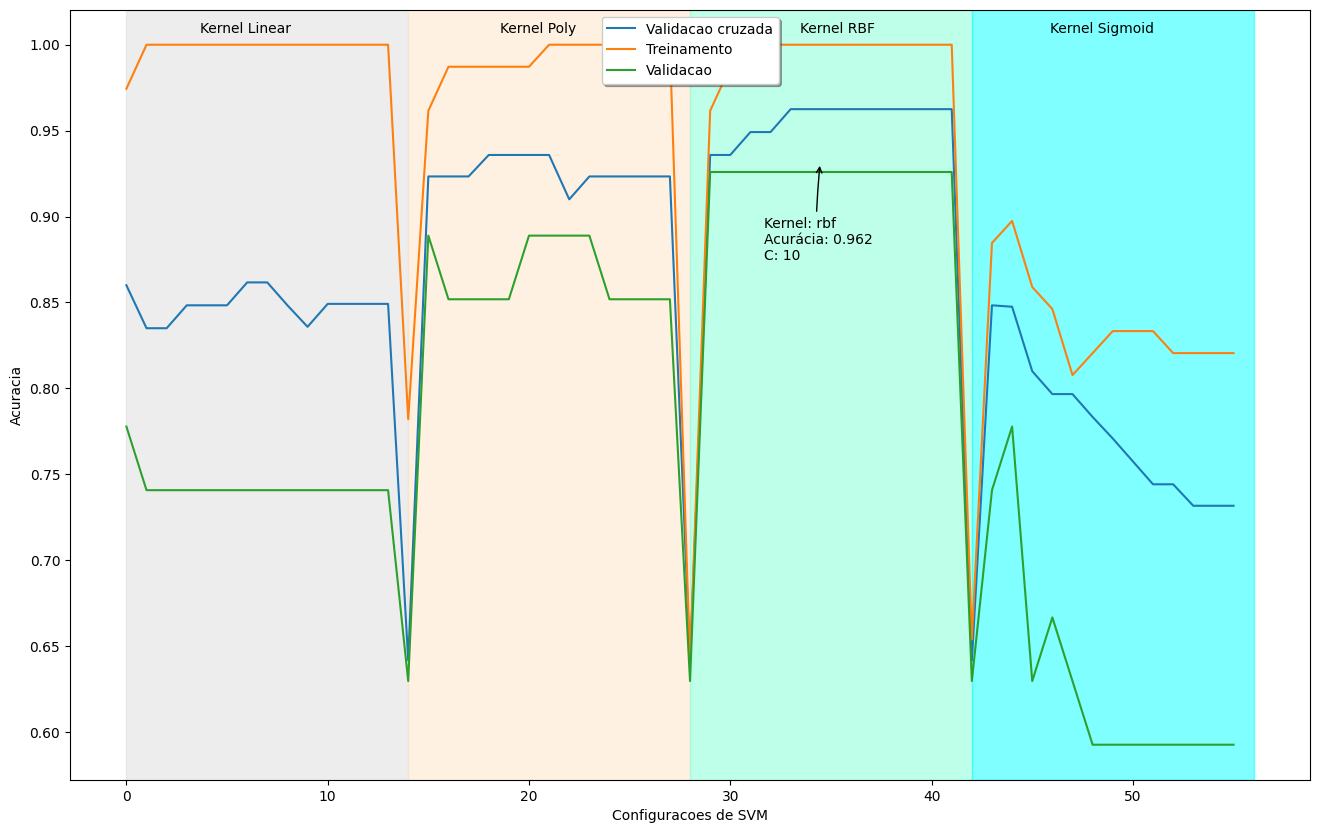

Desempenho da melhor configuracao testada:
Acuracia de treinamento clf: 1.000
Acuracia de validacao clf: 0.926
Acuracia de teste clf: 0.923


In [ ]:

import numpy
import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.colors as mcolors
from math import ceil
plt.rcParams['figure.figsize'] = [16, 10]

# nomeando as 35 colunas
names = ['pulse_n1_a1', 'pulse_n1_a2', 'pulse_n2_a1', 'pulse_n2_a2',
         'pulse_n3_a1', 'pulse_n3_a2', 'pulse_n4_a1', 'pulse_n4_a2',
         'pulse_n5_a1', 'pulse_n5_a2', 'pulse_n6_a1', 'pulse_n6_a2',
         'pulse_n7_a1', 'pulse_n7_a2', 'pulse_n8_a1', 'pulse_n8_a2',
         'pulse_n9_a1', 'pulse_n9_a2', 'pulse_n10_a1', 'pulse_n10_a2',
         'pulse_n11_a1', 'pulse_n11_a2', 'pulse_n12_a1', 'pulse_n12_a2',
         'pulse_n13_a1', 'pulse_n13_a2', 'pulse_n14_a1', 'pulse_n14_a2',
         'pulse_n15_a1', 'pulse_n15_a2', 'pulse_n16_a1', 'pulse_n16_a2',
         'pulse_n17_a1', 'pulse_n17_a2', 'ionosctruct']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning
dataset = pandas.read_csv("ionosphere.data", names=names)

print("Primeiros dados")
print(dataset.head(5))

#divisao de dados atributos e classe
X = dataset.values[:, 0:-1] #caracteristicas
Y = dataset.values[:, -1] #classe_

# checking the distribution of classes
# unique, counts =  numpy.unique(Y, return_counts=True)
# class_distribution = dict(zip(unique, counts))
# print("Distribuicao das classes no dataset:")
# print(class_distribution)

#construindo conjuntos de treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.70, stratify=Y, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, stratify=y_train, random_state = 10)

#criando o classificador
clf = SVC()

#treinando o classificador com a funcao fit
clf.fit(X_train, y_train)

#construindo o espaco de busca por configuracoes do classificador
kernels_range = ['linear','poly','rbf','sigmoid']
c_range =[0.1,1,2,4,5,10,15,20,30,50,100,200,500,1000]
gamma_ = [1,3,4,5,7,10,15,20,25,30,40,50,100,200,500,1000]
k_scores_train = []
k_scores_valid = []
k_scores_cross = []

# use iteration to caclulator different kernels in models,
# then return the average accuracy based on the cross validation
for j in range(len(kernels_range)):
  for k in c_range:
    if(kernels_range[j]=='linear'):
      svc = LinearSVC(C=k)
    else:
      svc = SVC(C=k, kernel=kernels_range[j])
    scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    k_scores_cross.append(scores.mean())
    svc.fit(X_train, y_train)
    k_scores_train.append(svc.score(X_train, y_train))
    k_scores_valid.append(svc.score(X_valid, y_valid))


#encontrando a melhor configuracao testada
the_best_acc=k_scores_cross.index(max(k_scores_cross))
the_best_kernel=ceil(the_best_acc/len(c_range))-1
the_best_c = the_best_acc/len(c_range)
the_best_c = (the_best_c-int(the_best_c))*len(c_range)
st_out = ("Kernel: " + str(kernels_range[the_best_kernel])+" \nAcurácia: " +
          str(round(k_scores_cross[the_best_acc],3))+"\nC: "+str(c_range[int(the_best_c)]))

# Apresentando todas as configuracoes testadas
plt.plot(list(range(0,len(k_scores_cross))), k_scores_cross)
plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
plt.axvspan(0, len(c_range), color='gainsboro', alpha=0.5)
plt.axvspan(len(c_range), 2*len(c_range), color='bisque', alpha=0.5)
plt.axvspan(2*len(c_range), 3*len(c_range), color='aquamarine', alpha=0.5)
plt.axvspan(3*len(c_range), 4*len(c_range), color='cyan', alpha=0.5)
plt.annotate('Kernel Linear',xy=(200, 800), xycoords='figure pixels')
plt.annotate('Kernel Poly',xy=(500, 800), xycoords='figure pixels')
plt.annotate('Kernel RBF',xy=(800, 800), xycoords='figure pixels')
plt.annotate('Kernel Sigmoid',xy=(1050, 800), xycoords='figure pixels')
plt.annotate(st_out, xy=(820, 670), xycoords='figure pixels',xytext=(-40, -70), textcoords='offset points',
        arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-95"))

plt.legend(('Validacao cruzada', 'Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Configuracoes de SVM')
plt.ylabel('Acuracia')
plt.show()

#desempenho da melhor configuracao
clf = SVC(C=c_range[int(the_best_c)], kernel=kernels_range[the_best_kernel])

#treinando o classificador com a funcao fit
clf.fit(X_train, y_train)
print("Desempenho da melhor configuracao testada:")
print("Acuracia de treinamento clf: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de validacao clf: %0.3f" %  clf.score(X_valid, y_valid))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))
